In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Women_s_E-Commerce_Clothing_Reviews_1594_1.csv',sep=';', on_bad_lines='skip')
data.drop('Unnamed: 0', axis = 1, inplace  =True)

In [11]:
data.head()

,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review.Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended.IND          23486 non-null  int64 
 6   Positive.Feedback.Count  23486 non-null  int64 
 7   Division.Name            23472 non-null  object
 8   Department.Name          23472 non-null  object
 9   Class.Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [20]:
print('Column\t\tMissing Count')
print("**"*20)
print(data.isna().sum())
print("**"*20)
print(data.isna().sum().sum())

Column		Missing Count
****************************************
Clothing.ID                   0
Age                           0
Title                      3810
Review.Text                 845
Rating                        0
Recommended.IND               0
Positive.Feedback.Count       0
Division.Name                14
Department.Name              14
Class.Name                   14
dtype: int64
****************************************
4697


In [25]:
print('Column\t\t\tMissing %')
print("**"*20)
print(round(data.isna().sum() / data.shape[0]*100,2))
print("**"*20)

Column			Missing %
****************************************
Clothing.ID                 0.00
Age                         0.00
Title                      16.22
Review.Text                 3.60
Rating                      0.00
Recommended.IND             0.00
Positive.Feedback.Count     0.00
Division.Name               0.06
Department.Name             0.06
Class.Name                  0.06
dtype: float64
****************************************


In [26]:
#dropping NaN
data.dropna(inplace= True)

In [27]:
print('Column\t\t\tMissing %')
print("**"*20)
print(round(data.isna().sum() / data.shape[0]*100,2))
print("**"*20)

Column			Missing %
****************************************
Clothing.ID                0.0
Age                        0.0
Title                      0.0
Review.Text                0.0
Rating                     0.0
Recommended.IND            0.0
Positive.Feedback.Count    0.0
Division.Name              0.0
Department.Name            0.0
Class.Name                 0.0
dtype: float64
****************************************


In [33]:
cols = {'Clothing.ID' : "Id",
       'Review.Text' : "Review",
       'Recommended.IND' : 'Recommended',
       'Positive.Feedback.Count' : 'Count',
       'Division.Name' : 'Devision',
       'Department.Name' : 'Dept',
       'Class.Name' : 'Class'}
data.rename(columns=cols, inplace= True)
data.reset_index(drop= True, inplace= True)

In [34]:
data.head()

,Id,Age,Title,Review,Rating,Recommended,Count,Devision,Dept,Class
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


## EDA

In [37]:
num_col = [col for col in data.describe() if col != 'Id']

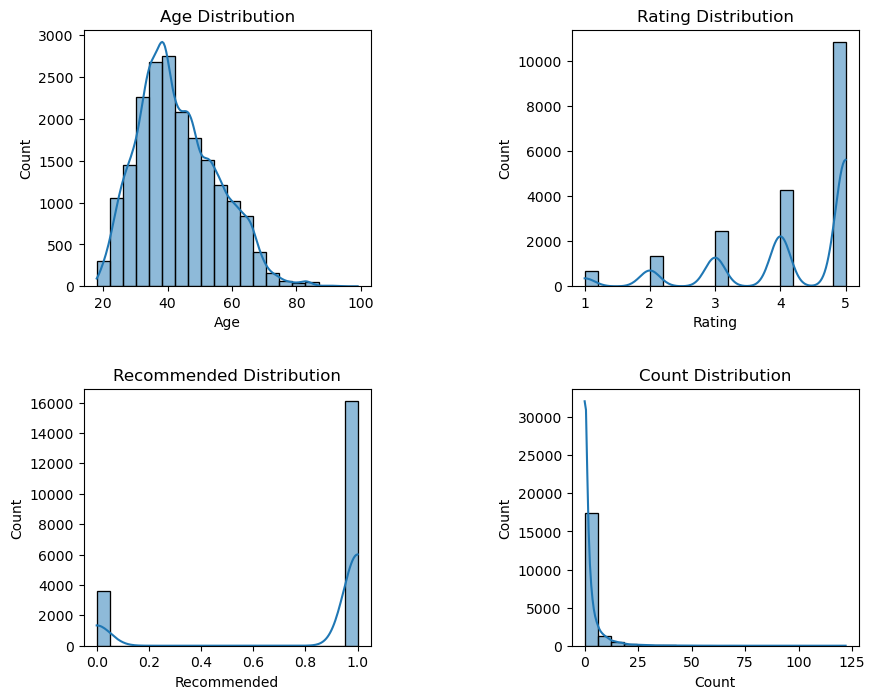

In [46]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace = .7, hspace=.4)
for i in range(len(num_col)):
    plt.subplot(len(num_col)//2,2,i+1)
    sns.histplot(data[num_col[i]], kde= True, bins= 20,)
    plt.title(f'{num_col[i]} Distribution')
plt.show()

- Recommended is Discrite variable.
- Count is skewed.
- Ratting is Ordinal variabl

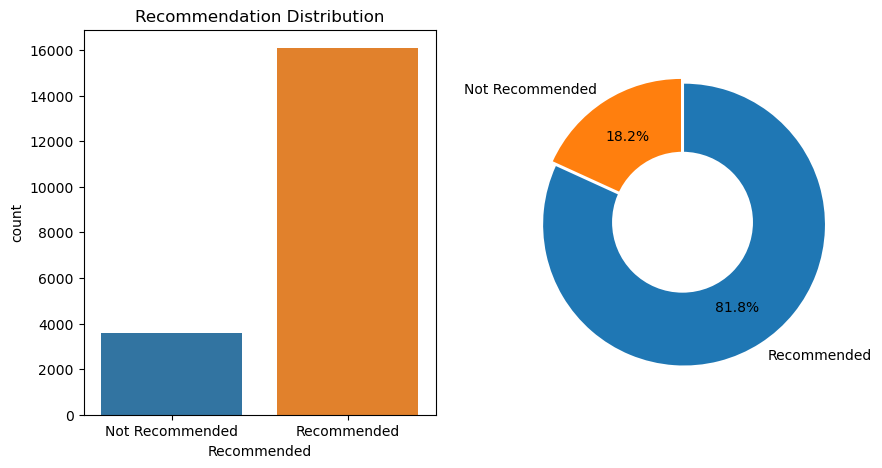

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x =data['Recommended'])
plt.xticks([1,0],['Recommended', 'Not Recommended'])
plt.title("Recommendation Distribution")
plt.subplot(1,2,2)
plt.pie(data['Recommended'].value_counts().values, labels=['Recommended', 'Not Recommended'],autopct= '%.1f%%',
        counterclock= False, startangle= 90, explode=[0.02 for i in data['Recommended'].value_counts().index.values],
       pctdistance=0.7)
circle = plt.Circle((0,0),radius=0.5, fc = 'white')
fig = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

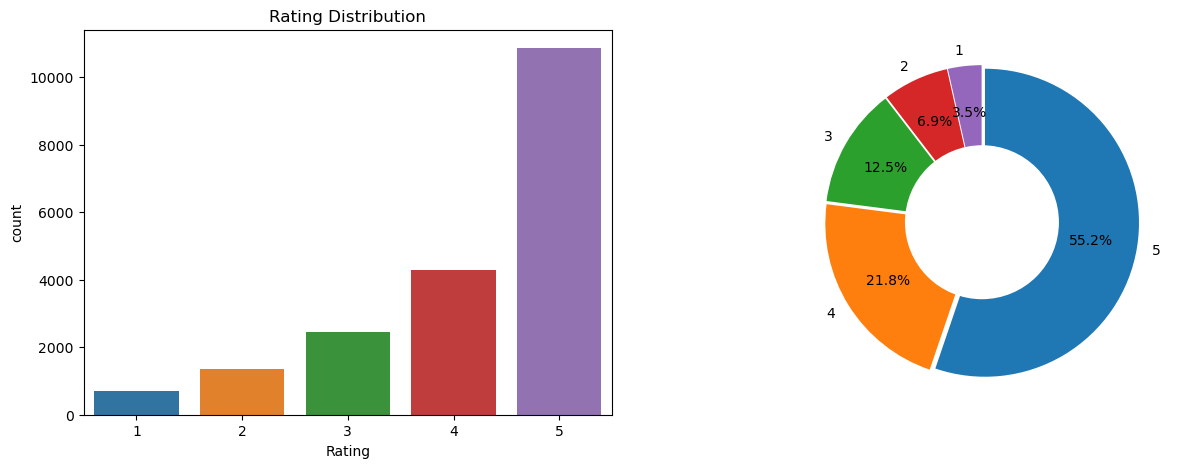

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x =data['Rating'])
plt.title("Rating Distribution")
plt.subplot(1,2,2)
plt.pie(data['Rating'].value_counts().values, labels= data['Rating'].value_counts().index,
        autopct= '%.1f%%',
        counterclock= False, startangle= 90, 
        explode=[0.02 for i in data['Rating'].value_counts().index.values],
       pctdistance=0.7)
circle = plt.Circle((0,0),radius=0.5, fc = 'white')
fig = plt.gcf()
plt.gca().add_artist(circle)
plt.show()

- Most of the products are rated 5.

<Axes: xlabel='Age', ylabel='Rating'>

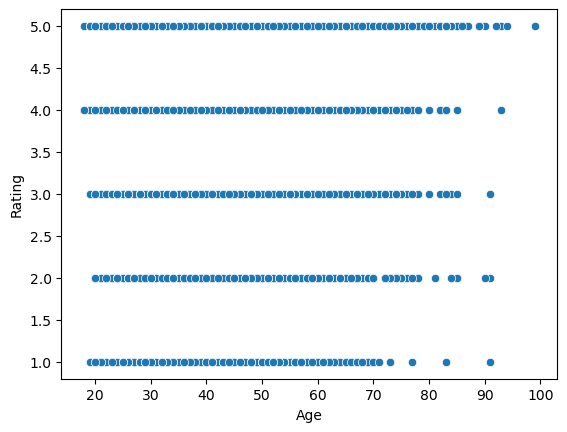

In [91]:
#checking age contribution on the rattings
sns.scatterplot(data= data, x = 'Age', y = 'Rating')